In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import Autoencoder

2024-06-25 21:31:21.385009: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 21:31:21.419146: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 21:31:21.419725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 21:31:22.094651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_shape = x_train.shape[1:]

print (x_train.shape)
print (x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [4]:
input_dim = x_train.shape[1]

Without hidden layers (mse + relu)

In [5]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = []
decoder_layers = []

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

2024-06-25 21:31:23.674937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-25 21:31:23.675445: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1121 - val_loss: 0.0714
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0686 - val_loss: 0.0652
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0637 - val_loss: 0.0624
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0619 - val_loss: 0.0613
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0610 - val_loss: 0.0605
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0603 - val_loss: 0.0599
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0597 - val_loss: 0.0594
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0592 - val_loss: 0.0589
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0588 - val_loss: 0.0586
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0585 - val_loss: 0.0583

Visualization

313/313 [==============================] - 0s 569us/step


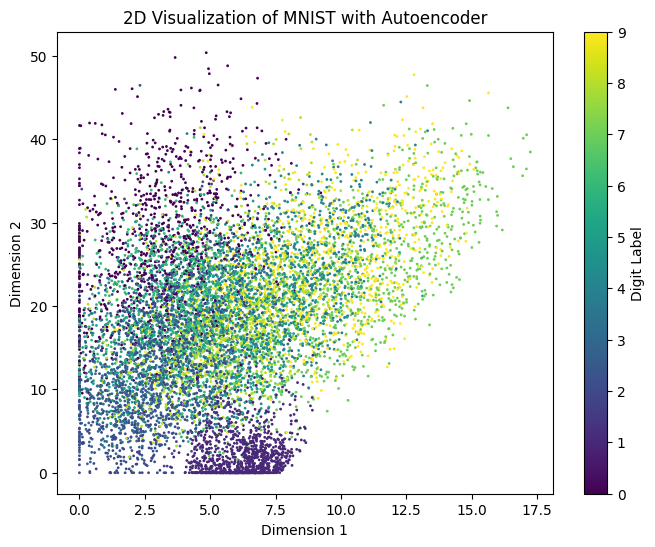

In [6]:
autoencoder.visualize_2d(x_test, y_test, False)

Compression and decompression

In [7]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 545us/step


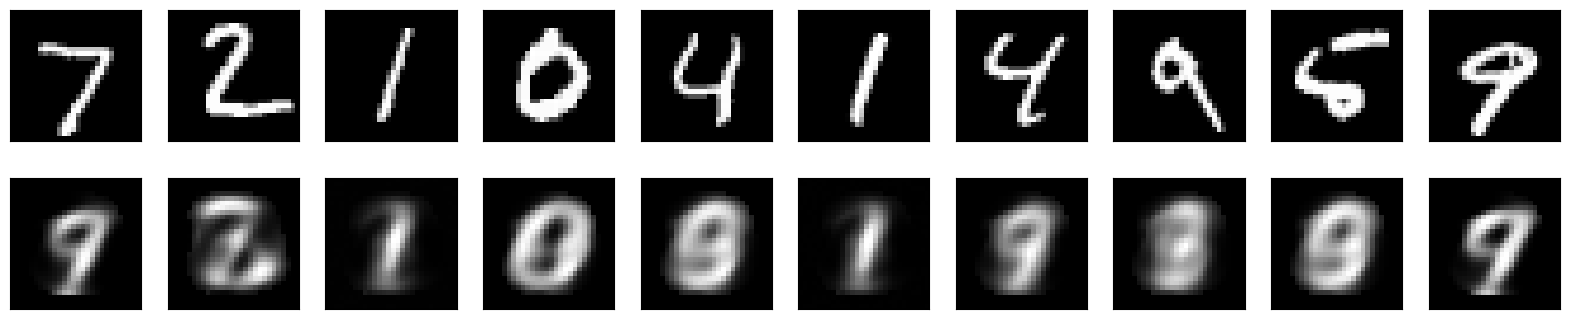

In [8]:
plot_comparison(x_test, decoded_data)

Image generation

1/1 [==============================] - 0s 14ms/step


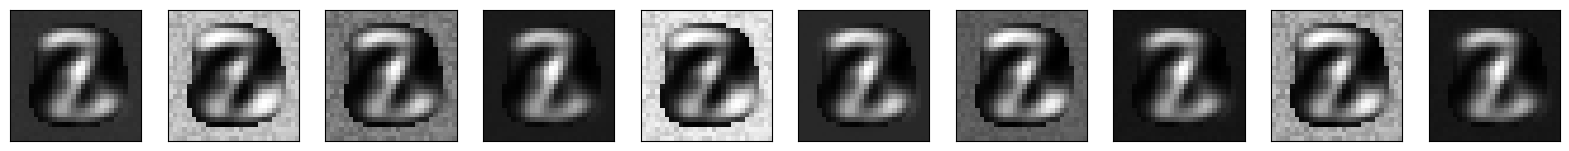

In [9]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + relu)

In [10]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0790 - val_loss: 0.0596
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0566 - val_loss: 0.0543
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0533 - val_loss: 0.0520
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0504 - val_loss: 0.0488
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0482 - val_loss: 0.0475
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0470 - val_loss: 0.0465
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0463 - val_loss: 0.0459
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0457 - val_loss: 0.0455
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0451 - val_loss: 0.0448
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0445 - val_loss: 0.0443

313/313 [==============================] - 0s 654us/step


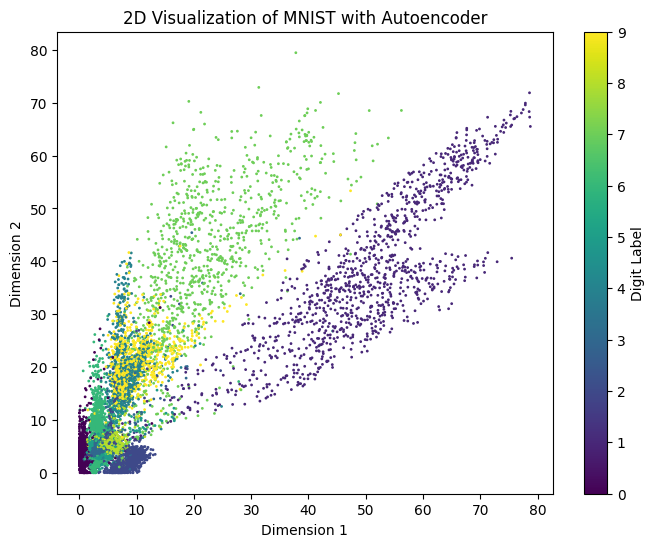

In [11]:
autoencoder.visualize_2d(x_test, y_test, False)

In [12]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 658us/step


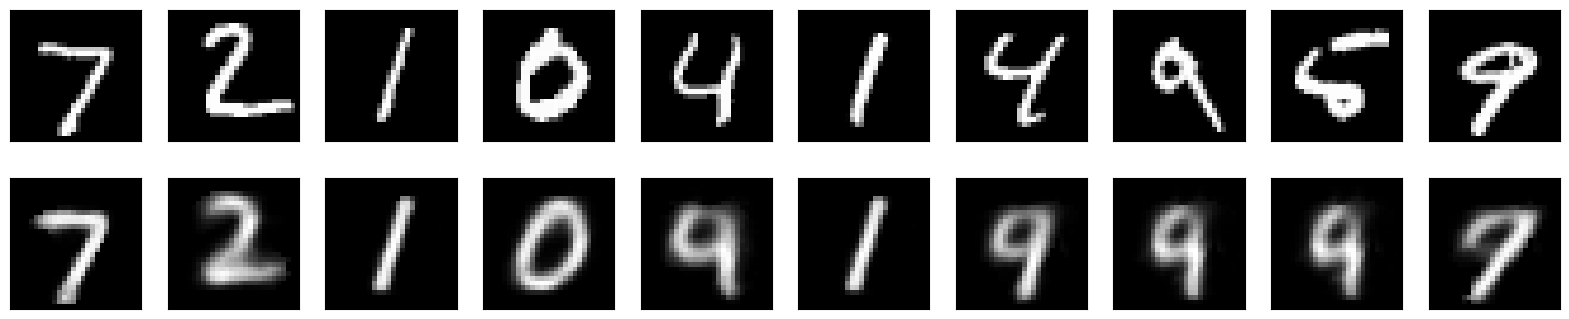

In [13]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 14ms/step


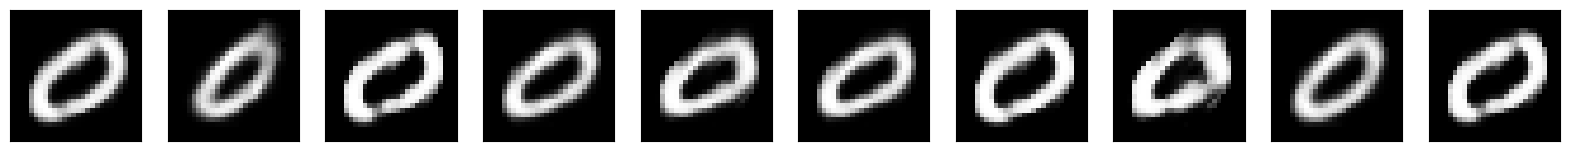

In [14]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Without hidden layers (binary_crossentropy + relu)

In [15]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2959 - val_loss: 0.2412
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2324 - val_loss: 0.2236
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2181 - val_loss: 0.2129
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2118 - val_loss: 0.2093
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2088 - val_loss: 0.2068
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2063 - val_loss: 0.2050
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2039 - val_loss: 0.2023
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2020 - val_loss: 0.2009
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2002 - val_loss: 0.1994
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1985 - val_loss: 0.1977

313/313 [==============================] - 0s 626us/step


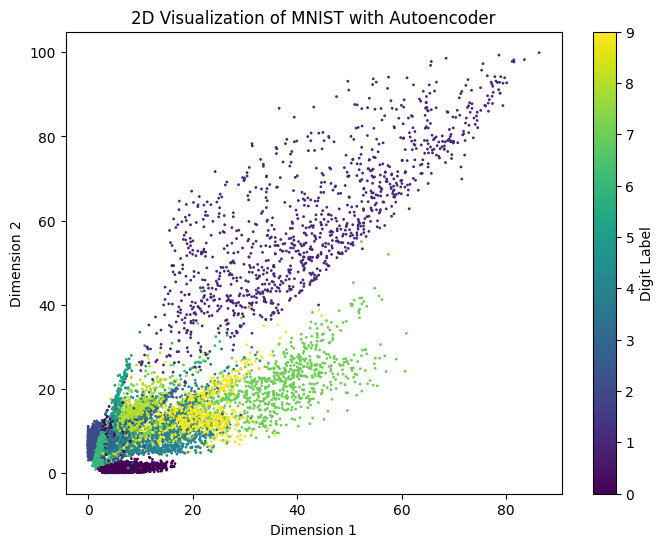

In [16]:
autoencoder.visualize_2d(x_test, y_test, False)

In [17]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 619us/step


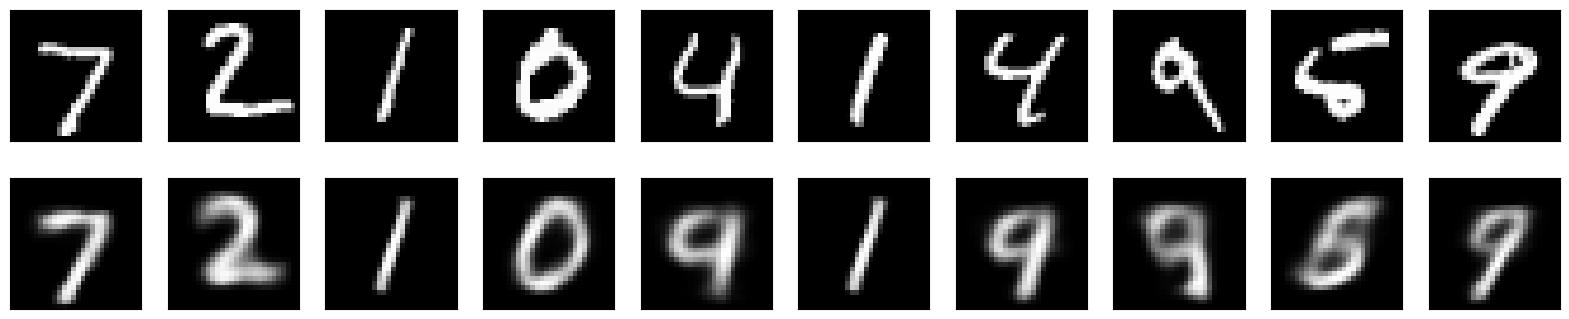

In [18]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 13ms/step


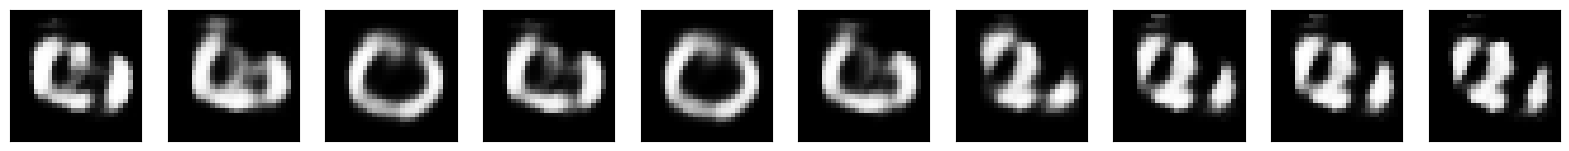

In [19]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + leaky_relu)

In [20]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0802 - val_loss: 0.0659
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0614 - val_loss: 0.0573
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0554 - val_loss: 0.0535
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0528 - val_loss: 0.0516
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0509 - val_loss: 0.0499
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0494 - val_loss: 0.0485
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0480 - val_loss: 0.0472
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0469 - val_loss: 0.0463
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0460 - val_loss: 0.0456
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0453 - val_loss: 0.0452

313/313 [==============================] - 0s 624us/step


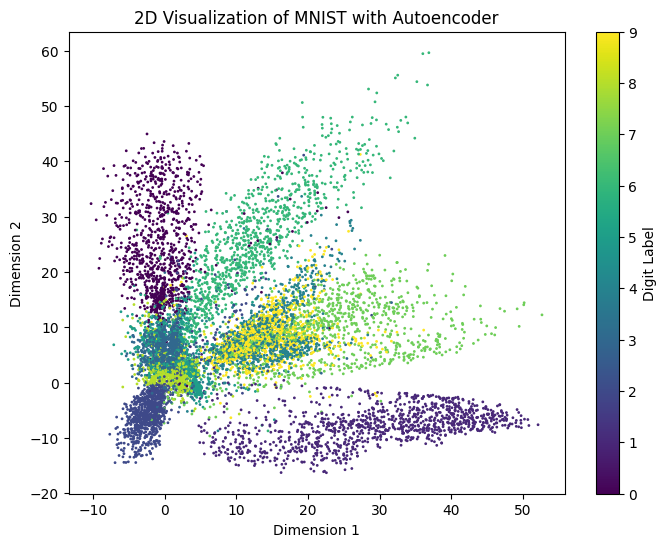

In [21]:
autoencoder.visualize_2d(x_test, y_test, False)

In [22]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 612us/step


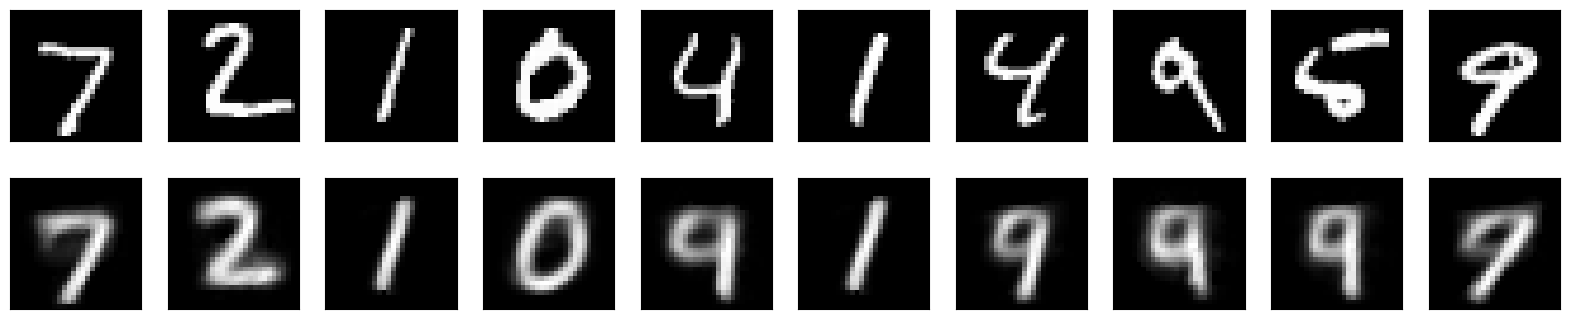

In [23]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 13ms/step


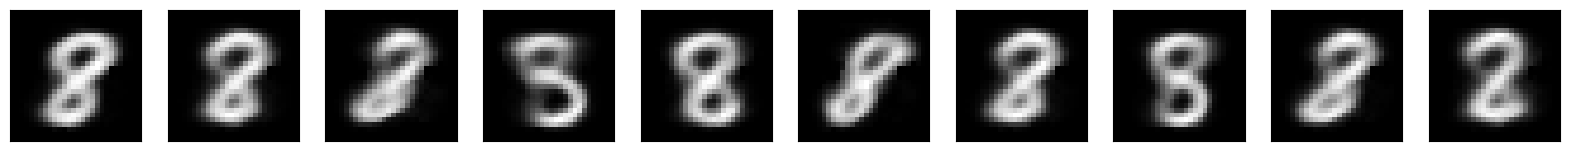

In [24]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (binary_crossentropy + leaky_relu)

In [25]:
encoding_dim = 2
epochs = 100
batch_size = 256

encoder_layers = [64, 128]
decoder_layers = [128, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2937 - val_loss: 0.2431
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2336 - val_loss: 0.2255
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2222 - val_loss: 0.2172
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2148 - val_loss: 0.2118
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2102 - val_loss: 0.2087
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2071 - val_loss: 0.2054
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2038 - val_loss: 0.2026
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2012 - val_loss: 0.2009
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1993 - val_loss: 0.1987
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1975 - val_lo

313/313 [==============================] - 0s 629us/step


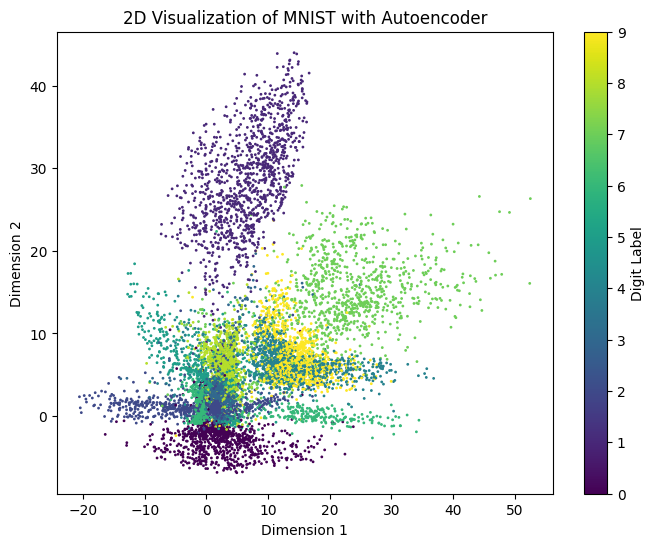

In [26]:
autoencoder.visualize_2d(x_test, y_test, False)

In [27]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 616us/step


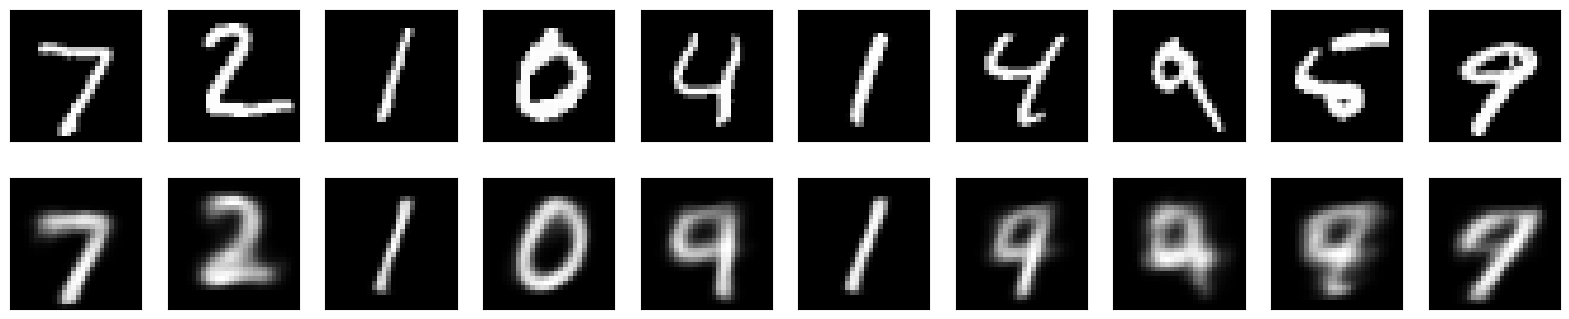

In [28]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 13ms/step


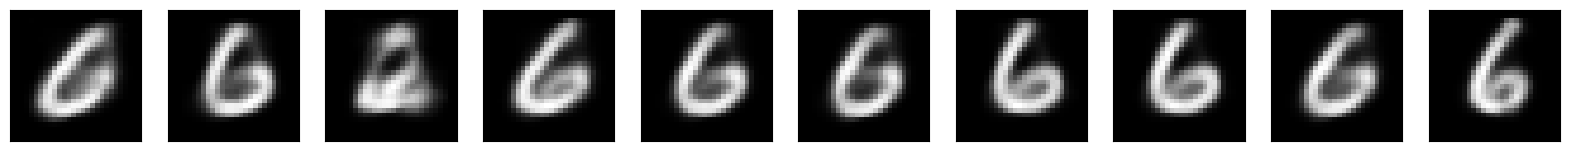

In [29]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With hidden layers (mse + tanh)

In [30]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 32]
decoder_layers = [32, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='mse',
                        activation='tanh',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0863 - val_loss: 0.0677
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0673 - val_loss: 0.0676
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0676
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0673 - val_loss: 0.0675

313/313 [==============================] - 0s 620us/step


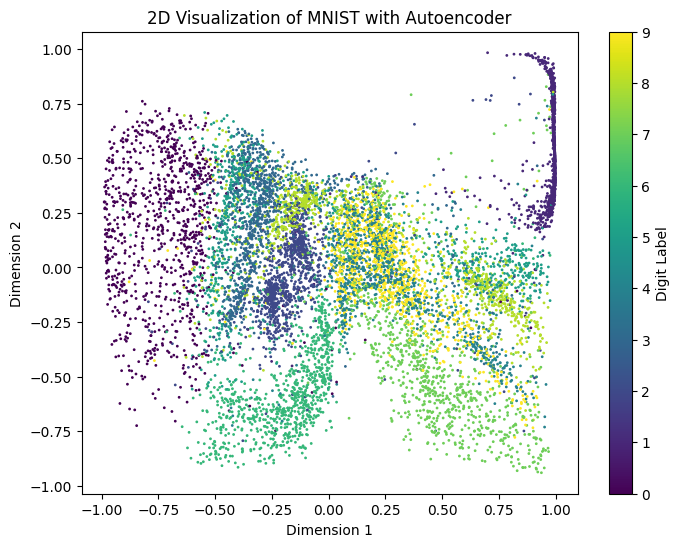

In [31]:
autoencoder.visualize_2d(x_test, y_test, False)

In [32]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 656us/step


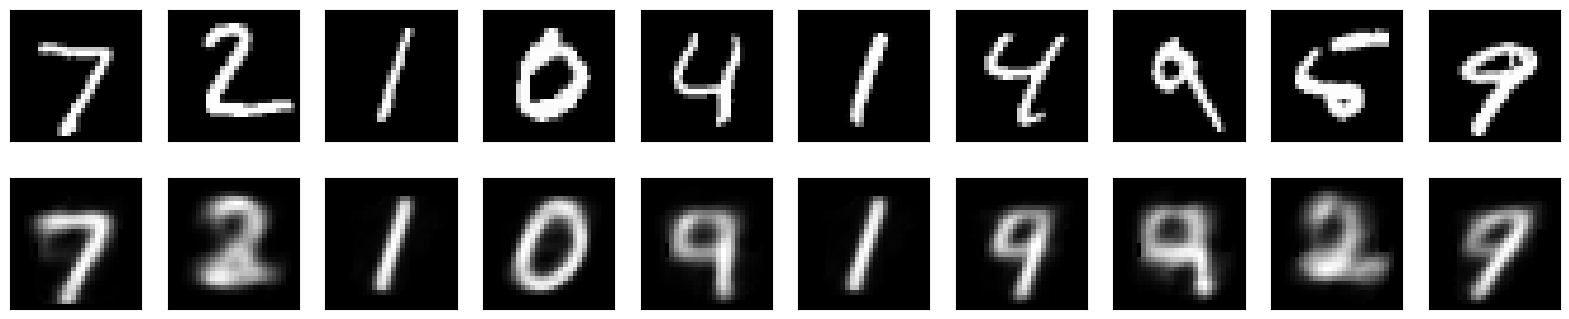

In [33]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 12ms/step


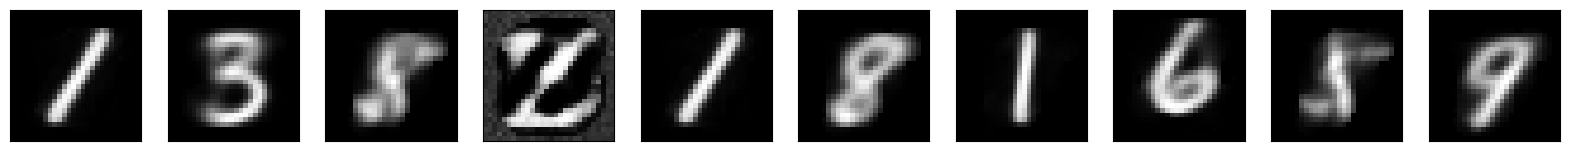

In [34]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With more hidden layers (mse + tanh)

In [35]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [64, 32, 16, 8]
decoder_layers = [8, 16, 32, 64]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3043 - val_loss: 0.2575
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2492 - val_loss: 0.2369
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2330 - val_loss: 0.2278
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2242 - val_loss: 0.2178
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2153 - val_loss: 0.2100
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2081 - val_loss: 0.2046
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2037 - val_loss: 0.2012
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2005 - val_loss: 0.1994
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1985 - val_loss: 0.1975
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1968 - val_loss: 0.1958

313/313 [==============================] - 0s 669us/step


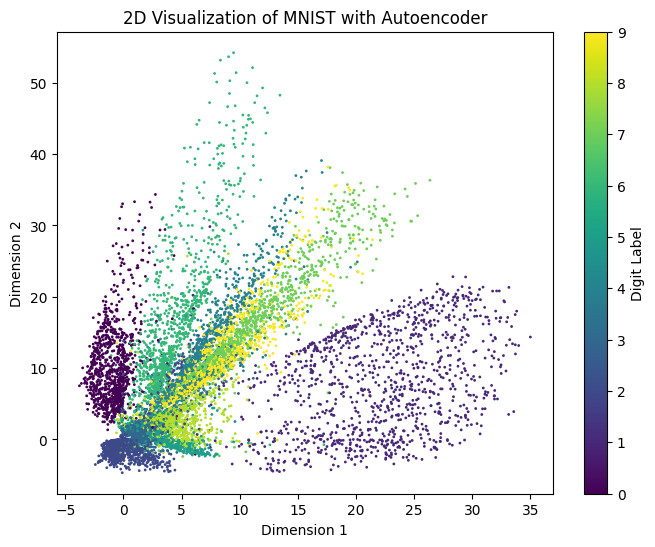

In [36]:
autoencoder.visualize_2d(x_test, y_test, False)

In [37]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 623us/step


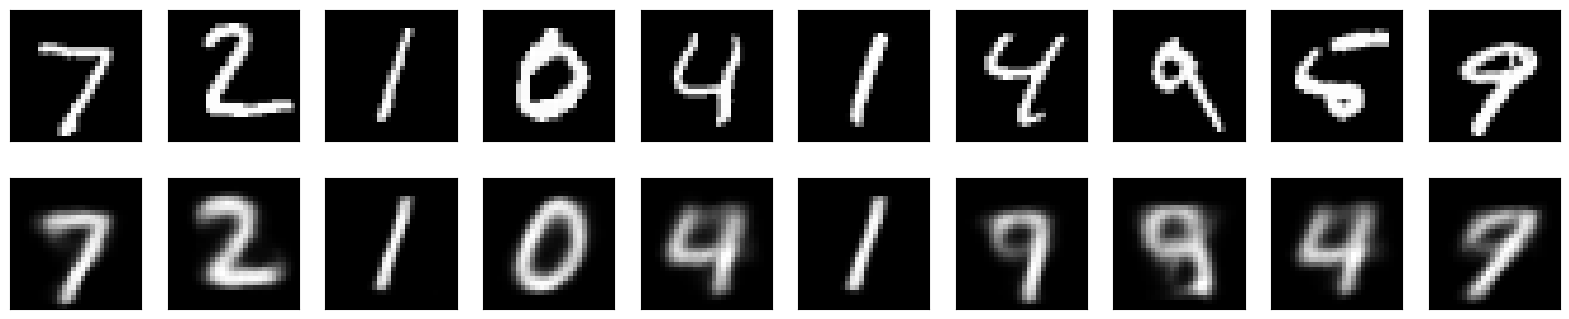

In [38]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 12ms/step


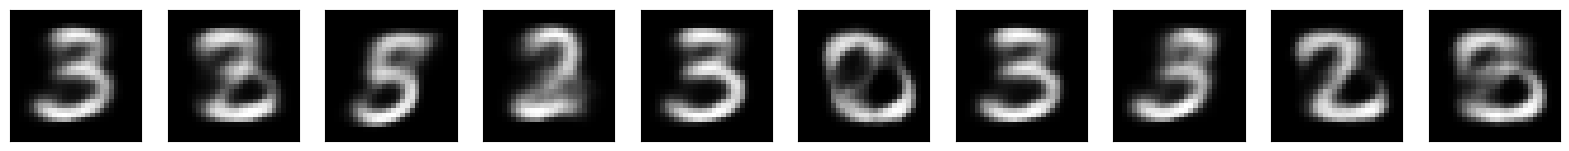

In [39]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [77]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [128, 64, 32, 16, 8, 4]
decoder_layers = [4, 8, 16, 32, 64, 128]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='leaky_relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.2922 - val_loss: 0.2511
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2362 - val_loss: 0.2261
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2210 - val_loss: 0.2141
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2107 - val_loss: 0.2068
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2034 - val_loss: 0.2010
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1989 - val_loss: 0.1973
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1957 - val_loss: 0.1948
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1933 - val_loss: 0.1930
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1910 - val_loss: 0.1908
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1893 - val_loss: 0.1885

313/313 [==============================] - 0s 716us/step


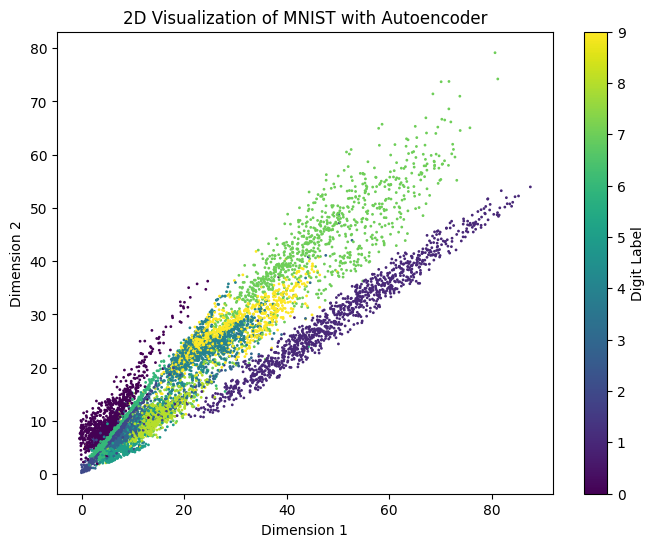

In [78]:
autoencoder.visualize_2d(x_test, y_test, False)

In [79]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 752us/step


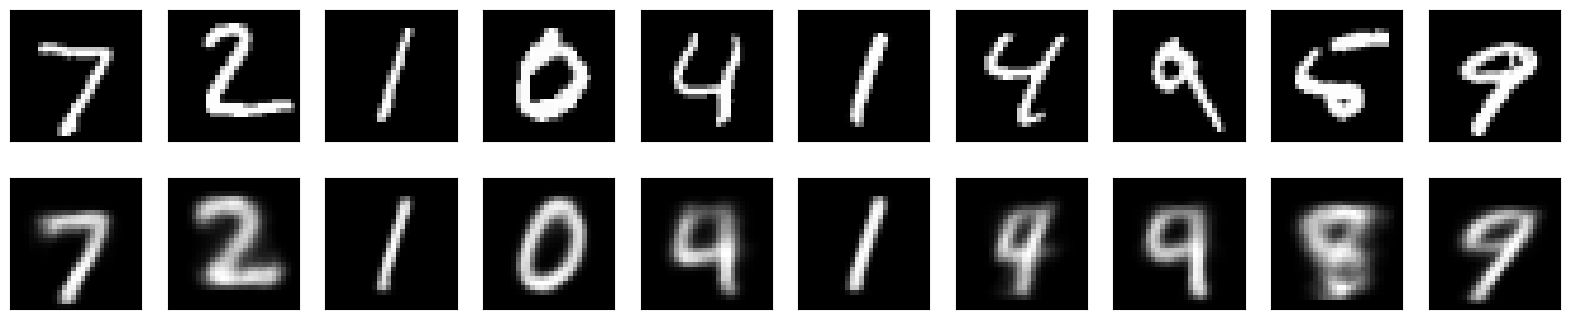

In [80]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 13ms/step


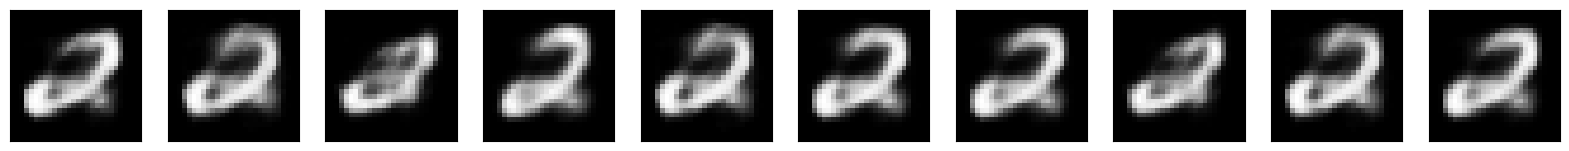

In [81]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [107]:
encoding_dim = 2
epochs = 50
batch_size = 256

encoder_layers = [128, 64, 32, 16, 8, 4]
decoder_layers = [4, 8, 16, 32, 64, 128]

autoencoder = Autoencoder(input_dim=input_dim,
                        encoding_dim=encoding_dim, 
                        encoder_layers=encoder_layers, 
                        decoder_layers=decoder_layers,
                        loss='binary_crossentropy',
                        activation='tanh',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.3041 - val_loss: 0.2633
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2545 - val_loss: 0.2407
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2370 - val_loss: 0.2318
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2281 - val_loss: 0.2224
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2206 - val_loss: 0.2160
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2160 - val_loss: 0.2128
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2126 - val_loss: 0.2103
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2098 - val_loss: 0.2081
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2085 - val_loss: 0.2064
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2069 - val_loss: 0.2046

313/313 [==============================] - 0s 656us/step


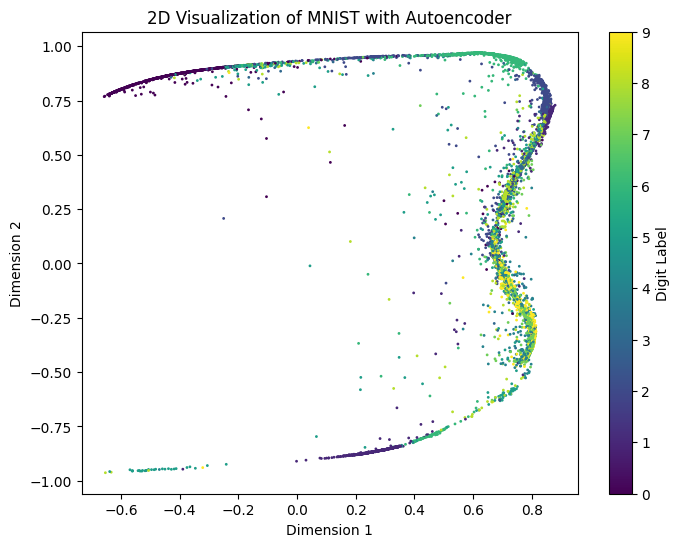

In [108]:
autoencoder.visualize_2d(x_test, y_test, False)

In [109]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

313/313 [==============================] - 0s 703us/step


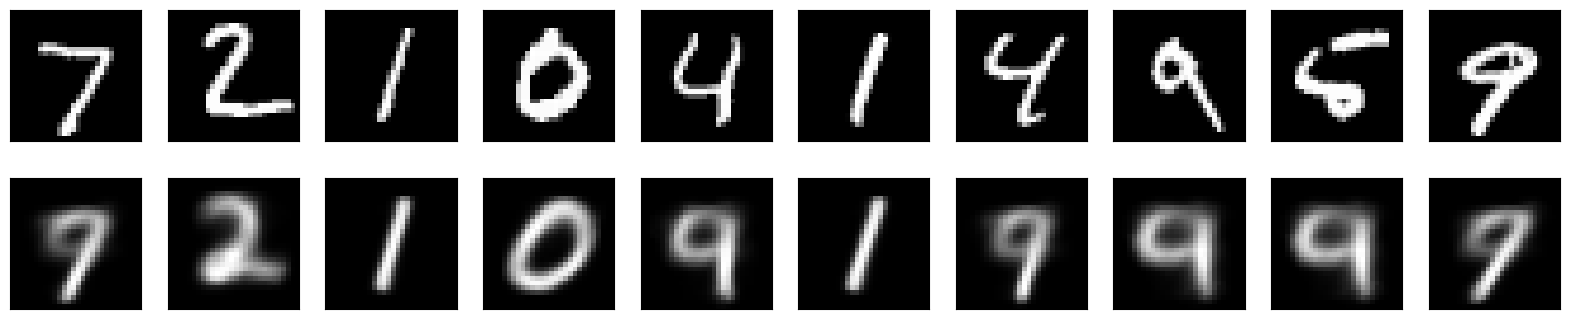

In [110]:
plot_comparison(x_test, decoded_data)

1/1 [==============================] - 0s 13ms/step


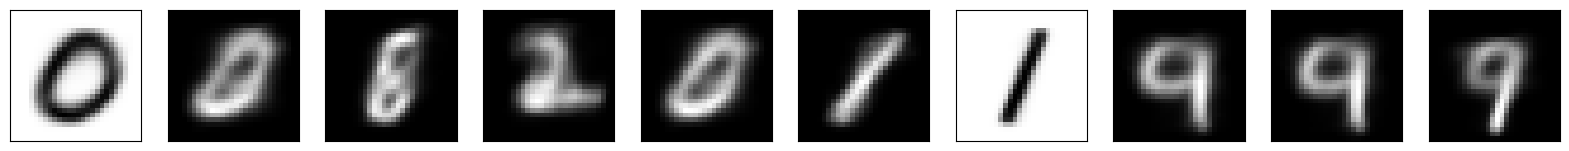

In [111]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(x_shape[0], x_shape[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()